## Appendix A: Import, Analyse and Visualise Data

In [1]:
#import relevant packages and libraries
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as statsmodels # import stats package with regression functions
%matplotlib inline 
plt.rcParams.update({'font.size': 14})

#set styles for my grids
sns.set(color_codes=True, font_scale = 1.2)
sns.set_style("whitegrid")

#import the data using pandas
#this reads the data into a "dataframe"
unfiltered_data = pd.read_csv("heartattack.csv", sep=',')

In [2]:
#filter out only the men, using the column 'sex'
only_men = unfiltered_data['sex']==1
data = unfiltered_data[only_men]
data = data[['sex','age','maxhr']]

#this shows the first 7 rows of data on men
data.head(7)

,sex,age,maxhr
0,1,63,150
1,1,37,187
3,1,56,178
5,1,57,148
7,1,44,173
8,1,52,162
9,1,57,174


In [3]:
#this checks for any missing values
#sieves through the data to check for any null values
#represented as a percentage of missing values in each column in the dataset
data.isnull().sum()/len(unfiltered_data)*100

sex      0.0
age      0.0
maxhr    0.0
dtype: float64

In [4]:
#print the summary statistics (count, mean, SD, etc.)

#as explained in the documentation, Bessel's correction is used by default. 
#this means that the denominator in the calculation of standard deviation is n-1
#(https://pandas/pydata.org/panadas-docs/stable/generated/pandas.DataFrame.std.html)

data.describe()

,sex,age,maxhr
count,207.0,207.000000,207.000000
mean,1.0,53.758454,148.961353
std,0.0,8.883803,24.130882
min,1.0,29.000000,71.000000
25%,1.0,47.000000,132.000000
50%,1.0,54.000000,151.000000
75%,1.0,59.500000,168.000000
max,1.0,77.000000,202.000000


In [5]:
#This function utilises the library functions to compute the median and the mode

def median_and_mode(column):
    print(column)
    print("- Median = ", np.median(data[column]))
    print("- Mode = ", stats.mode(data[column])[0][0]) #to make sure more than 1 mode can be returned
    
median_and_mode('age')
median_and_mode('maxhr')

age
- Median =  54.0
- Mode =  57
maxhr
- Median =  151.0
- Mode =  132


[63, 37, 56, 57, 44, 52, 57, 54, 49, 64, 43, 59, 44, 42, 61, 40, 59, 51, 53, 65, 44, 54, 51, 54, 48, 45, 39, 52, 44, 47, 66, 62, 52, 48, 45, 34, 54, 52, 41, 58, 51, 44, 54, 51, 29, 51, 51, 59, 52, 58, 41, 45, 52, 68, 46, 48, 57, 52, 53, 52, 43, 53, 42, 59, 42, 50, 69, 57, 43, 55, 41, 56, 59, 47, 42, 41, 62, 57, 64, 43, 70, 44, 42, 66, 64, 47, 35, 58, 56, 56, 41, 38, 38, 67, 67, 63, 53, 56, 48, 58, 58, 60, 40, 60, 64, 43, 57, 55, 58, 50, 44, 60, 54, 50, 41, 58, 54, 60, 60, 59, 46, 67, 62, 65, 44, 60, 58, 68, 52, 59, 49, 59, 57, 61, 39, 56, 63, 65, 48, 55, 65, 54, 70, 62, 35, 59, 64, 47, 57, 55, 64, 70, 51, 58, 60, 77, 35, 70, 64, 57, 56, 48, 66, 54, 69, 51, 43, 67, 59, 45, 58, 50, 38, 52, 53, 54, 66, 49, 54, 56, 46, 61, 67, 58, 47, 52, 58, 57, 61, 42, 52, 59, 40, 61, 46, 59, 57, 57, 61, 58, 67, 44, 63, 59, 45, 68, 57]
[150, 187, 178, 148, 173, 162, 174, 160, 171, 144, 171, 161, 179, 178, 137, 178, 157, 123, 152, 140, 188, 152, 125, 165, 180, 148, 182, 172, 180, 156, 151, 146, 158, 186, 

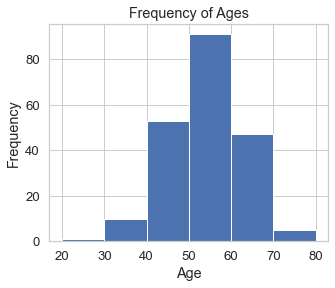

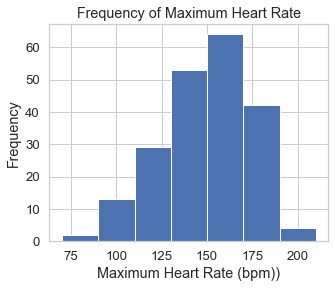

In [6]:
#transforms the dataframe into simple list for easier analysis
ages = list(data['age'].values)
maxhr = list(data['maxhr'].values)

print(ages)
print(maxhr)

%matplotlib inline
#this creates a histogram for age
def histogram_age():
    
    plt.figure(figsize=[5,4])
    x = ages
    
    bins_list = [20,30,40,50,60,70,80]
    n, bins, patches = plt.hist(x, bins_list)
    
    plt.title('Frequency of Ages')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    
    plt.show()

#this creates a histogram for max heart rate
def histogram_maxhr():
    
    plt.figure(figsize=[5,4])
    x = maxhr
    
    bins_list = [70,90,110,130,150,170,190,210]
    n, bins, patches = plt.hist(x, bins_list)
    
    plt.title('Frequency of Maximum Heart Rate')
    plt.xlabel('Maximum Heart Rate (bpm))')
    plt.ylabel('Frequency')

    plt.show()

histogram_age()
histogram_maxhr()


## Appendix B: Pearson's Correlation Coefficient Analysis (r-value)

In [31]:
#code adapted from CS51 Session 3 - (2.1) Regression II: Multiple Regression

#create the functions
#this function prints the pearson's correlation value for two columns
#define the function, it takes two arguments (two columns from the dataset printed above: age and maxhr)
def pcorr(column_a, column_b):
    print("The pearson's r value comparing", column_a , "to", column_b , "is:")
    print(round(data[column_a].corr(data[column_b]),3)) #computes r of both variables, rounds to three decimal places 
    print("")

# this function prints pearson's r for the two selected columns
# it also prints a scatterplot of the data with a trendline 
# the plot introduces "jitter" to offset the values, so that they are not printed on top of one another

#function to plot the two variables form above in a scatterplot 
def plotpcorr(column_a, column_b):
    pcorr(column_a, column_b)
    sns.set_palette("Set2")
    sns.regplot(x= column_a, y= column_b, data=data, marker="+", x_jitter=.25, y_jitter=.25)

#ensures that the above functions run
print("Functions loaded.")

Functions loaded.


The pearson's r value comparing age to maxhr is:
-0.409



Text(0.5, 0, 'Age')

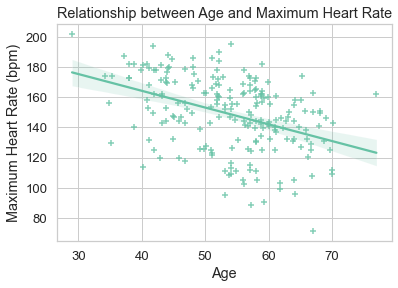

In [32]:
plt.title('Relationship between Age and Maximum Heart Rate')
plotpcorr('age', 'maxhr')
plt.ylabel('Maximum Heart Rate (bpm)')
plt.xlabel('Age')

## Appendix C: Coefficient of Determination (R-Squared Value)

In [33]:
#code adapted from CS51 Session 4 - (2.2) Synthesis: Correlation, Regression, and Statistics
def regression_model(column_x, column_y):
    # this function uses built in library functions to create a scatter plot,
    # plots of the residuals, compute R-squared, and display the regression eqn

    # fit the regression line using "statsmodels" library:
    X = statsmodels.add_constant(data[column_x])
    Y = data[column_y]
    regressionmodel = statsmodels.OLS(Y,X).fit() #OLS stands for "ordinary least squares"

    # extract regression parameters from model, rounded to 3 decimal places:
    Rsquared = round(regressionmodel.rsquared,3)
    slope = round(regressionmodel.params[1],3)
    intercept = round(regressionmodel.params[0],3)

    # make plots:
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(12,4))
    
    sns.regplot(x=column_x, y=column_y, data=data, marker="+", ax=ax1) # scatter plot
    sns.residplot(x=column_x, y=column_y, data=data, ax=ax2) # residual plot, to evaluate normality condition
    ax2.set(ylabel='Residuals')
    ax2.set_ylim(min(regressionmodel.resid)-1,max(regressionmodel.resid)+1)

    plt.figure() # histogram, for frequency of residuals
    plt.ylabel('Frequency')
    plt.title('Frequency of Residuals')
    sns.distplot(regressionmodel.resid, kde=False, axlabel='Residuals', color='red') # histogram

    # print the results:
    print("R-squared = ",Rsquared)
    print("Regression equation: "+column_y+" = ",slope,"* "+column_x+" + ",intercept)

/Users/rachaelchew/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/rachaelchew/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


R-squared =  0.167
Regression equation: maxhr =  -1.11 * age +  208.625


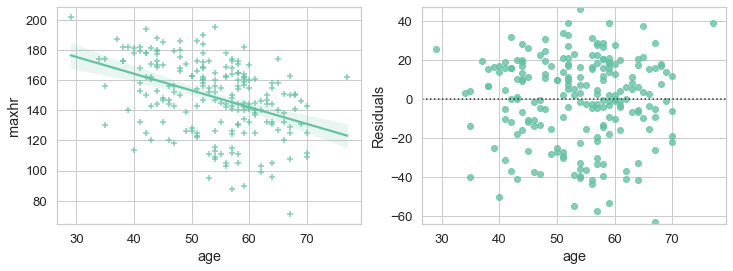

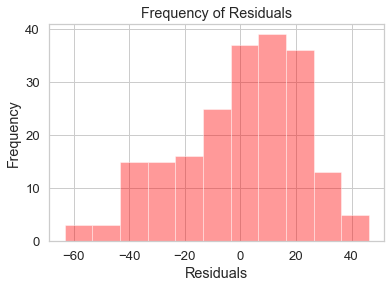

In [13]:
regression_model('age', 'maxhr')

## Appendix D: Hypothesis Testing (p-value)

In [28]:
# given summary statistics:
r = -0.409
# x = 53.758454
# y = 148.961353 
sx = 8.883803
sy = 24.130882
n = 207

b1 = (r*sy)/sx # this computes the point-estimate for the slope, by using r-value and the sd of x and y
print("b1 =",b1)

SE = (sy/sx)*((1-r**2)/(n-2))**0.5 #SE formula that uses 2 degrees of freedom, because of 2 variables
print("SE =",SE)

t = (b1-0)/(SE) #0 because the null hypothesis is slope=0
print("t =",t)

#calc p-value, with two degrees of freedom (because 2 variables are involved)
p = (stats.t.cdf(t,n-2))*2
print("p =",p)

b1 = -1.1109578564495408
SE = 0.17311973673898973
t = -6.4172801863979085
p = 9.441008154265827e-10


## Appendix E: Summary Table

In [34]:
#Code adapted from CS51 Session 4 - (2.2) Synthesis: Correlation, Regression, and Statistics

def mult_regression(column_x, column_y):
    ''' this function uses built in library functions to construct a linear 
    regression model with potentially multiple predictor variables. It outputs 
    two plots to assess the validity of the model.'''

    # If there is only one predictor variable, plot the regression line
    if len(column_x)==1:
        plt.figure()
        sns.regplot(x=column_x[0], y=column_y, data=data, marker="+",fit_reg=True,color='orange')
    
    # define predictors X and response Y:
    X = data[column_x]
    X = statsmodels.add_constant(X)
    Y = data[column_y]
    
    # construct model:
    global regressionmodel 
    regressionmodel = statsmodels.OLS(Y,X).fit() # OLS = "ordinary least squares"

    # residual plot:
    plt.figure()
    residualplot = sns.residplot(x=regressionmodel.predict(), y=regressionmodel.resid, color='green')
    residualplot.set(xlabel='Fitted values for '+column_y, ylabel='Residuals')
    residualplot.set_title('Residuals vs Fitted values',fontweight='bold',fontsize=14)
    
    # QQ plot:
    qqplot = statsmodels.qqplot(regressionmodel.resid,fit=True,line='45')
    qqplot.suptitle("Normal Probability (\"QQ\") Plot for Residuals",fontweight='bold',fontsize=14)

/Users/rachaelchew/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/rachaelchew/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  maxhr   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     41.08
Date:                Tue, 01 Feb 2022   Prob (F-statistic):           9.84e-10
Time:                        22:16:05   Log-Likelihood:                -933.30
No. Observations:                 207   AIC:                             1871.
Df Residuals:                     205   BIC:                             1877.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        208.6254      9.434     22.114      0.000     190.025     227.226
age           -1.1099      0.173     -6.410      0.000      -1.451      -0.768
==============================================================================
Omnibus:                       11.632   Durbin-Watson:                   1.698
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.609
Skew:                          -0.593   Prob(JB):                      0.00183
Kurtosis:                       2.765   Cond. No.                         335.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

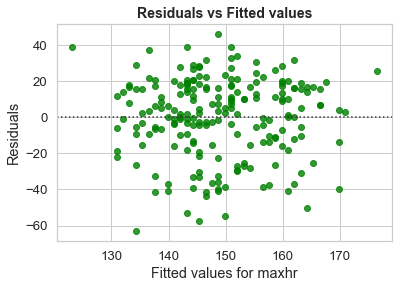

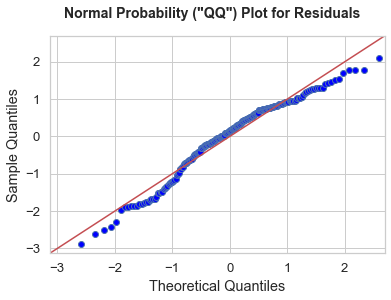

In [30]:
mult_regression('age', 'maxhr')
regressionmodel.summary()